In [119]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

### 1) Scratch implementation

In [120]:
def PCA(X, n_components=2):
    # Step 1: Mean-center the data
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Step 3: Project data onto principal components
    W = Vt[:n_components].T
    X_pca = X_centered @ W

    # Step 4: Flip signs to match sklearn's convention
    # The sign flipping step ensures that the largest absolute value in each principal component has a positive sign
    signs = np.sign(W[np.argmax(np.abs(W), axis=0), range(W.shape[1])])
    W *= signs
    X_pca *= signs

    return X_pca

In [121]:
# Load Handwritten digits dataset
digits = load_digits()
X = digits.data  # 64 dimensions/features (8x8 images)

In [122]:
X.shape  # 1797 samples, 64 dimensions/features

(1797, 64)

In [123]:
# Apply PCA to reduce to 2 dimensions
X_reduced = PCA(X, n_components=2)

In [124]:
X_reduced.shape

(1797, 2)

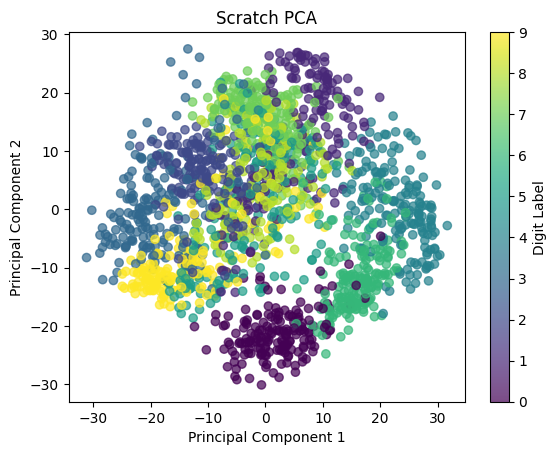

In [125]:
# Plot the transformed data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='viridis', alpha=0.7)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scratch PCA')
plt.show()

### 2) Sklearn's implementation

In [126]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
X_sk_reduced = PCA(n_components=2).fit_transform(X)

In [127]:
X_sk_reduced.shape

(1797, 2)

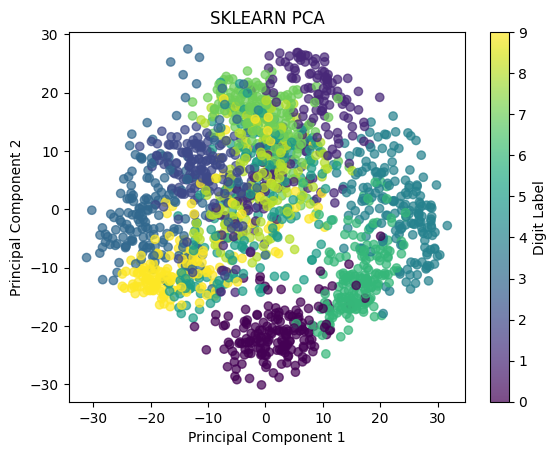

In [128]:
# Plot the transformed data
plt.scatter(X_sk_reduced[:, 0], X_sk_reduced[:, 1], c=digits.target, cmap='viridis', alpha=0.7)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SKLEARN PCA')
plt.show()